<a href="https://colab.research.google.com/github/THESHAMIK/Real-Life-Projects/blob/main/Deep_NN/KHDS_Scaling_Normalization_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attained one of highest score for KHDS project of 0.75 as R2 for TRAIN data only ==> This is when both X & y r scaled & Deep/Neural nw used.
Test Data is still 0.18 as r2.

The R2 score on the Train set is:	**0.753**
The RMSE score on the Train set is:	0.497
The MSE score on the Test set is:	0.247
The MSA score on the Test set is:	**0.368**
The MAPE score on the Test set is:	1.077

Now scores on TEST data
The R2 score on the Test set is:	0.186
The RMSE score on the Test set is:	2.469
The MSE score on the Test set is:	6.097
The MSA score on the Test set is:	0.872
The MAPE score on the Test set is:	1.424

NN Model name lr_model with increase batch size to 30 from 10 and epochs to 500 from 200 & check results.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import Adam ##because cannot import name 'Adam' from 'keras.optimizers'
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("khds_final_1.csv")
df['Product Sulphur'] = pd.to_numeric(df['Product Sulphur'],errors = 'coerce') ##==> This one works as pd.to_numeric works for convert a list, a series, an array, or a tuple to a numeric datatype
filtered_df = df[df['Product Sulphur'].notnull()]
df.dropna(axis=0)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 710
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LABfeed Sulphur                            711 non-null    float64
 1   T1 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 2   T1 : Reactor inlet temperature DEGC        711 non-null    float64
 3   T1 : Hydrogen make-up flow NM3perHour      711 non-null    float64
 4   T1 : Recycle hydrogen flow NM3perHour      711 non-null    float64
 5   T1 : REACTOR OUTLET Temp DEGC              711 non-null    float64
 6   T1 : REACTOR FEED INLET Pressure KGperCM2  711 non-null    float64
 7   T1 : Cold separator pressure KGperCM2      711 non-null    float64
 8   T1 : KERO FEED DENSITY KGperCM2            711 non-null    float64
 9   T2 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 10  T2 : Reactor inlet tempera

In [ ]:
target_col = "Product Sulphur"
X = filtered_df.loc[:, filtered_df.columns != target_col]
y = filtered_df.loc[:, target_col]

In [ ]:
# split into train and test ==> Not using train_test_split which is vertical split. Instead going for HORIZONTAL split
n_train = 568
trainX, testX = X.iloc[:n_train, :], X.iloc[n_train:, :]
#trainX = X.iloc[:n_train, :]
trainy, testy = y.iloc[:n_train], y.iloc[n_train:]

In [ ]:
trainX.shape

(568, 33)

In [ ]:
trainy.shape

(568,)

In [ ]:
testy.shape

(143,)

In [ ]:
testX.shape

(143, 33)

In [ ]:
len(testX)

143

In [ ]:
testy = testy.to_numpy()
testy = testy.reshape(-1,1)
trainy = trainy.to_numpy()
trainy = trainy.reshape(-1,1)

In [ ]:
testy = testy.reshape(-1,1)

In [ ]:
trainy = trainy.to_numpy()

In [ ]:
trainy = trainy.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# created scaler for only X predictors
input_scaler = StandardScaler()
# fit scaler on training dataset
# fit scaler
input_scaler.fit(trainy)
# transform training dataset
trainy_scaled = input_scaler.transform(trainy)
# transform test dataset
testy_scaled = input_scaler.transform(testy)

In [ ]:
testX.shape

(143, 1)

In [ ]:
trainX.shape

(568, 33)

In [ ]:
testy.shape

(143, 1)

In [ ]:
trainy.shape

(568, 1)

from keras.models import Sequential

In [ ]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam# define model
from keras.optimizer_v2.adam import Adam
model = Sequential()
model.add(Dense(64, input_dim=33, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
#model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.00001, momentum=0.9))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))


Train: 25125.127, Test: 7531.135 for no scaling for both X and y
Train: 1492.921, Test: 1864.310 for y scaled but X same
Train: 0.774, Test: 7.438 ==> When both X and y r scaled!

In [ ]:
# fit model
history = model.fit(trainX, trainy_scaled, validation_data=(testX, testy_scaled), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy_scaled, verbose=0)
test_mse = model.evaluate(testX, testy_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 1492.921, Test: 1864.310


In [ ]:
trainX.shape

(568, 33)

In [ ]:
trainy.shape

(568, 1)

In [ ]:
testX.shape

(143, 33)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
# created scaler for only X predictors
input_scaler = StandardScaler()
# fit scaler on training dataset
# fit scaler
input_scaler.fit(trainX)
# transform training dataset
trainX_scaled = input_scaler.transform(trainX)
# transform test dataset
testX_scaled = input_scaler.transform(testX)

In [ ]:
trainX_scaled.shape

(568, 33)

In [ ]:
testX.shape

(143, 33)

In [ ]:
# fit model
history = model.fit(trainX_scaled, trainy_scaled, validation_data=(testX_scaled, testy_scaled), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX_scaled, trainy_scaled, verbose=0)
test_mse = model.evaluate(testX_scaled, testy_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.774, Test: 7.438


In [ ]:
scores = model.evaluate(trainX_scaled, trainy_scaled, verbose=0)
scores

0.774394154548645

In [ ]:
print(model.metrics_names)

['loss']


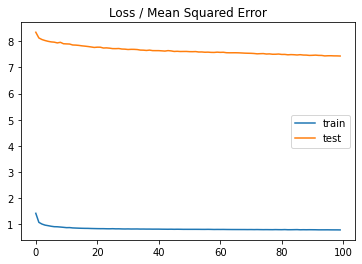

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Now let's bring in the optimized model of Deep/NN & check.

In [ ]:
## KHDS_KerasTuner_Optimized_NN_2 ==> from here we picked the best model with best r2 so far!!
##PASS 10: ==> lETS replicate pass 2 --> PASS 2: This has best result so far on both test & train = R2. 
from keras.activations import linear
batch_size = 10
epochs = 200

# build the model
#input_dim = X_train_scaled.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform')) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(512, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
lr_model.add(Dropout(0.1))
lr_model.add(Dense(128, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
lr_model.add(Dropout(0.1))
#lr_model.add(Dense(256, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
#lr_model.add(Dropout(0.1))
lr_model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))

# compile the model
#lr_model.compile(loss='mean_squared_error',optimizer=sgd)
lr_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse', 'mae', 'mape'])

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto') #patience reduced to 10 from 15

In [ ]:
# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history_4 = lr_model.fit(trainX_scaled, trainy, batch_size=batch_size, epochs = epochs, validation_split = 0.2,shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 12: early stopping


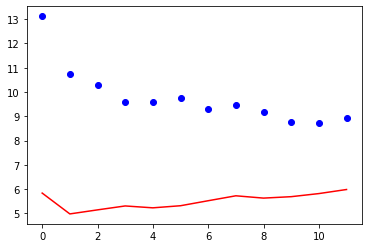

In [ ]:
# Plots 'history'
history_dict=history_4.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_scaled)
y_test_pred = lr_model.predict(testX_scaled)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy, y_train_pred)))

The R2 score on the Train set is:	0.094
The RMSE score on the Train set is:	2.777
The MSE score on the Test set is:	7.712
The MSA score on the Test set is:	1.575
The MAPE score on the Test set is:	0.555


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	-0.123
The RMSE score on the Test set is:	8.460
The MSE score on the Test set is:	71.564
The MSA score on the Test set is:	3.213
The MAPE score on the Test set is:	0.451


In [ ]:
history_4_1 = lr_model.fit(trainX_scaled, trainy, batch_size=batch_size, epochs = epochs, validation_data=(testX_scaled, testy),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 140: early stopping


Here above --> X is scaled but y is NOT scaled.

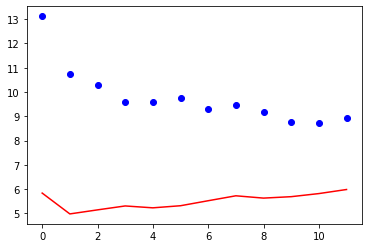

In [ ]:
# Plots 'history'
history_dict=history_4.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_scaled)
y_test_pred = lr_model.predict(testX_scaled)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy, y_train_pred)))

The R2 score on the Train set is:	0.645
The RMSE score on the Train set is:	1.738
The MSE score on the Test set is:	3.022
The MSA score on the Test set is:	1.059
The MAPE score on the Test set is:	0.312


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	0.166
The RMSE score on the Test set is:	7.291
The MSE score on the Test set is:	53.156
The MSA score on the Test set is:	2.568
The MAPE score on the Test set is:	0.311


In [ ]:
history_5 = lr_model.fit(trainX_scaled, trainy_scaled, batch_size=batch_size, epochs = epochs, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 11: early stopping


Now above history_5 = both X & y is scaled!

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_scaled)
y_test_pred = lr_model.predict(testX_scaled)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy_scaled, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy_scaled, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy_scaled, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy_scaled, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy_scaled, y_train_pred)))

The R2 score on the Train set is:	0.709
The RMSE score on the Train set is:	0.539
The MSE score on the Test set is:	0.291
The MSA score on the Test set is:	0.395
The MAPE score on the Test set is:	1.287


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy_scaled, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy_scaled, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy_scaled, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy_scaled, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy_scaled, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	0.185
The RMSE score on the Test set is:	2.471
The MSE score on the Test set is:	6.105
The MSA score on the Test set is:	0.900
The MAPE score on the Test set is:	1.629


THe above scores r much better when u check MSE& MSA from best model pickup prog = > KHDS_KerasTuner_Optimized_NN_2
The R2 score on the Train set is:	0.673
The RMSE score on the Train set is:	2.578
The MSE score on the Test set is:	6.646
The MSA score on the Test set is:	1.342
The MAPE score on the Test set is:	0.365
Now scores on TEST data
The R2 score on the Test set is:	0.186
The RMSE score on the Test set is:	4.118
The MSE score on the Test set is:	16.959
The MSA score on the Test set is:	1.654
The MAPE score on the Test set is:	0.387

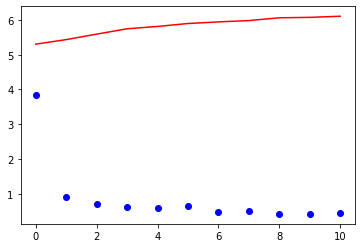

In [ ]:
# Plots 'history'
history_dict=history_5.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [ ]:
history_6 = lr_model.fit(trainX, trainy_scaled, batch_size=batch_size, epochs = epochs, validation_data=(testX, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 11: early stopping


Above history_6 only y is SCALED & X is not scaled

In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX)
y_test_pred = lr_model.predict(testX)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy_scaled, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy_scaled, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy_scaled, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy_scaled, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy_scaled, y_train_pred)))

The R2 score on the Train set is:	-67.434
The RMSE score on the Train set is:	8.272
The MSE score on the Test set is:	68.434
The MSA score on the Test set is:	3.221
The MAPE score on the Test set is:	18.333


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy_scaled, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy_scaled, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy_scaled, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy_scaled, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy_scaled, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	-0.809
The RMSE score on the Test set is:	3.681
The MSE score on the Test set is:	13.549
The MSA score on the Test set is:	3.131
The MAPE score on the Test set is:	15.983


Horrible score so lets stick to both X & y as scaled. & check if we can improve on that model?

Lets take model5 (both X & y scaled) & increase batch size to 30 from 10 and epochs to 500 from 200 & check results.

In [ ]:
history_5_1 = lr_model.fit(trainX_scaled, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 165: early stopping


In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_scaled)
y_test_pred = lr_model.predict(testX_scaled)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy_scaled, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy_scaled, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy_scaled, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy_scaled, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy_scaled, y_train_pred)))

The R2 score on the Train set is:	0.753
The RMSE score on the Train set is:	0.497
The MSE score on the Test set is:	0.247
The MSA score on the Test set is:	0.368
The MAPE score on the Test set is:	1.077


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy_scaled, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy_scaled, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy_scaled, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy_scaled, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy_scaled, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	0.186
The RMSE score on the Test set is:	2.469
The MSE score on the Test set is:	6.097
The MSA score on the Test set is:	0.872
The MAPE score on the Test set is:	1.424


No doubt BEST r2 score for TRAIN of 0.753 but TEST score is still low...

Auto-Keras, or How You can Create a Deep Learning Model in 4 Lines of Code

In [ ]:
!pip install autokeras

     |████████████████████████████████| 162 kB 7.3 MB/s 
     |████████████████████████████████| 133 kB 42.6 MB/s 
     |████████████████████████████████| 462 kB 37.6 MB/s 


In [ ]:
import plotly.express as px
import autokeras as ak
from autokeras import StructuredDataRegressor
from sklearn.model_selection import train_test_split
from IPython.display import HTML

In [ ]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=3, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(trainX_scaled, trainy_scaled, epochs=100)

Trial 3 Complete [00h 00m 06s]
val_loss: 0.5763899683952332

Best val_loss So Far: 0.5763899683952332
Total elapsed time: 00h 00m 24s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 1.1095 - mean_squared_error: 1.1095
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9470 - mean_squared_error: 0.9470
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.9023 - mean_squared_error: 0.9023
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8856 - mean_squared_error: 0.8856
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8727 - mean_squared_error: 0.8727
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8640 - mean_squared_error: 0.8640
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8551 - mean_squared_error: 0.8551
Epoch 8/100
18/18 [==============================] - 0s 3ms/step 

In [ ]:
# Predict with the best model.
predicted_y_scaled = reg.predict(testX_scaled)

5/5 [==============================] - 0s 5ms/step


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(predicted_y_scaled,testy_scaled))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 2.474448095588665


In [ ]:
# Measure MSE error.  
score = metrics.mean_squared_error(predicted_y_scaled,testy_scaled)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(predicted_y_scaled,testy_scaled)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(predicted_y_scaled,testy_scaled)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(predicted_y_scaled,testy_scaled)
print("Final score (MAPE): {}".format(score3))
#score4 = metrics.mean_squared_log_error(predicted_y_scaled,testy_scaled)
#print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,testy_scaled)

Final score (MSE): 6.122893377762371
Final score (MAE): 0.8093436874593429
Final score (R2): -17.210139256045256
Final score (MAPE): 5.452198501882145


SO with DEEP best model + increase in batch_size to 30 from 10 & epochs to 500 from 200 ==> result for TEST was:
Now scores on TEST data
The R2 score on the Test set is:	0.186
The RMSE score on the Test set is:	2.469
The MSE score on the Test set is:	6.097
The MSA score on the Test set is:	0.872
The MAPE score on the Test set is:	1.424

Here with AUTOML - AUTOKERAS killer for DEEP much worst result where both X & y scaled
Before save score (RMSE): 2.474448095588665
Final score (MSE): 6.122893377762371
Final score (MAE): 0.8093436874593429
Final score (R2): -17.210139256045256
Final score (MAPE): 5.452198501882145

While yes R2 score was horrible for AUTOKERAS as -17 but MSE/MAE/RMSE r very similar!!

In [ ]:
import numpy as np

In [ ]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# create scaler
scaler_MIN_MAX = MinMaxScaler()
# fit scaler on data
scaler_MIN_MAX.fit(trainX)
# apply transform
trainX_norm = scaler_MIN_MAX.transform(trainX)
testX_norm = scaler_MIN_MAX.transform(testX)
# inverse transform
#inverse = scaler.inverse_transform(normalized)

In [ ]:
# fit model - for NORM X but y basic #trainy_scaled
#history_normX_scaledY = lr_model.fit(trainX_norm, trainy, validation_data=(testX_norm, testy), epochs=100, verbose=0)
history_normX_basicy = lr_model.fit(trainX_norm, trainy, batch_size=30, epochs = 500, validation_data=(testX_norm, testy),shuffle = True, verbose = 0, callbacks = [earlystopper])
# evaluate the model
train_mse = model.evaluate(trainX_norm, trainy, verbose=0)
test_mse = model.evaluate(testX_norm, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Epoch 27: early stopping
Train: 22.291, Test: 98.113


In [ ]:
# fit model - for NORM X but SCALED y 
#history_normX_scaledY_1 = model.fit(trainX_norm, trainy_scaled, validation_data=(testX_norm, testy_scaled), epochs=100, verbose=0)
history_normX_Scaledy = lr_model.fit(trainX_norm, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_norm, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])
# evaluate the model
train_mse = model.evaluate(trainX_norm, trainy_scaled, verbose=0)
test_mse = model.evaluate(testX_norm, testy_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Epoch 14: early stopping
Train: 0.855, Test: 7.778


In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_norm)
y_test_pred = lr_model.predict(testX_norm)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy_scaled, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy_scaled, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy_scaled, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy_scaled, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy_scaled, y_train_pred)))

The R2 score on the Train set is:	0.030
The RMSE score on the Train set is:	0.985
The MSE score on the Test set is:	0.970
The MSA score on the Test set is:	0.620
The MAPE score on the Test set is:	1.291


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy_scaled, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy_scaled, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy_scaled, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy_scaled, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy_scaled, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	-0.044
The RMSE score on the Test set is:	2.796
The MSE score on the Test set is:	7.817
The MSA score on the Test set is:	1.051
The MAPE score on the Test set is:	1.467


No better score than X SCALED + y Scaled which was :
Now scores on TEST data
The R2 score on the Test set is:	0.186
The RMSE score on the Test set is:	2.469
The MSE score on the Test set is:	6.097
The MSA score on the Test set is:	0.872
The MAPE score on the Test set is:	1.424

In [ ]:
# create scaler
scaler_MIN_MAX = MinMaxScaler()
# fit scaler on data
scaler_MIN_MAX.fit(trainy)
# apply transform
trainy_norm = scaler_MIN_MAX.transform(trainy)
testy_norm = scaler_MIN_MAX.transform(testy)
# inverse transform
#inverse = scaler.inverse_transform(normalized)

In [ ]:
# fit model - for NORM X but SCALED y 
#history_normX_scaledY_1 = model.fit(trainX_norm, trainy_scaled, validation_data=(testX_norm, testy_scaled), epochs=100, verbose=0)
history_normX_normy = lr_model.fit(trainX_norm, trainy_norm, batch_size=30, epochs = 500, validation_data=(testX_norm, testy_norm),shuffle = True, verbose = 0, callbacks = [earlystopper])
# evaluate the model
train_mse = model.evaluate(trainX_norm, trainy_norm, verbose=0)
test_mse = model.evaluate(testX_norm, testy_norm, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Epoch 51: early stopping
Train: 0.122, Test: 0.133


In [ ]:
# Runs model with its current weights on the training and testing data
y_train_pred = lr_model.predict(trainX_norm)
y_test_pred = lr_model.predict(testX_norm)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainy_norm, y_train_pred)))
print("The RMSE score on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(trainy_norm, y_train_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(trainy_norm, y_train_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(trainy_norm, y_train_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(trainy_norm, y_train_pred)))

The R2 score on the Train set is:	-1.613
The RMSE score on the Train set is:	0.111
The MSE score on the Test set is:	0.012
The MSA score on the Test set is:	0.064
The MAPE score on the Test set is:	1566020904413.374


In [ ]:
print("Now scores on TEST data")
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testy_norm, y_test_pred)))
print("The RMSE score on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(testy_norm, y_test_pred))))
print("The MSE score on the Test set is:\t{:0.3f}".format(mean_squared_error(testy_norm, y_test_pred)))
print("The MSA score on the Test set is:\t{:0.3f}".format(mean_absolute_error(testy_norm, y_test_pred)))
print("The MAPE score on the Test set is:\t{:0.3f}".format(mean_absolute_percentage_error(testy_norm, y_test_pred)))

Now scores on TEST data
The R2 score on the Test set is:	-0.023
The RMSE score on the Test set is:	0.190
The MSE score on the Test set is:	0.036
The MSA score on the Test set is:	0.092
The MAPE score on the Test set is:	0.827


**SCORES for X SCALED + y scaled ::**
The R2 score on the Train set is:	0.709
The RMSE score on the Train set is:	0.539
The MSE score on the Test set is:	0.291
The MSA score on the Test set is:	0.395
The MAPE score on the Test set is:	1.287

Now scores on TEST data
The R2 score on the Test set is:	0.185
The RMSE score on the Test set is:	2.471
The MSE score on the Test set is:	6.105
The MSA score on the Test set is:	0.900
The MAPE score on the Test set is:	1.629


**Scores for X norm + y Scaled ::**
The R2 score on the Train set is:	0.030
The RMSE score on the Train set is:	0.985
The MSE score on the Test set is:	0.970
The MSA score on the Test set is:	0.620
The MAPE score on the Test set is:	1.291

Now scores on TEST data
The R2 score on the Test set is:	-0.044
The RMSE score on the Test set is:	2.796
The MSE score on the Test set is:	7.817
The MSA score on the Test set is:	1.051
The MAPE score on the Test set is:	1.467

CONCLUSION ==> **X scale + y scale performed mych better infact best **so far than X norm + y norm OR X norm + yscale

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["mse"], label="train accuracy")
    axs[0].plot(history.history["val_mse"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
print ("Dict key-value are : ")
for i in history_5_1.history :
    print(i, history_5_1.history[i])

Dict key-value are : 
loss [0.5561032295227051, 0.599965512752533, 0.5727571845054626, 0.5853535532951355, 0.572195827960968, 0.6057645678520203, 0.7154065370559692, 0.5831663608551025, 0.5449534058570862, 0.5170917510986328, 0.5397329926490784, 0.5070592761039734, 0.5040320754051208, 0.5371047258377075, 0.5510883331298828, 0.5090973377227783, 0.5048242211341858, 0.48919087648391724, 0.4759109914302826, 0.5267165899276733, 0.46239057183265686, 0.5133925676345825, 0.49979013204574585, 0.44342684745788574, 0.46871039271354675, 0.6287029981613159, 0.4584386646747589, 0.4378873407840729, 0.46384769678115845, 0.5435317754745483, 0.45379525423049927, 0.45105621218681335, 0.4796868860721588, 0.4659671485424042, 0.4540005624294281, 0.46561774611473083, 0.4605269134044647, 0.5367909669876099, 0.4239926040172577, 0.4356895983219147, 0.4544668197631836, 0.42511871457099915, 0.4048503339290619, 0.5414429903030396, 0.4274463653564453, 0.37266021966934204, 0.4896402060985565, 0.4858139455318451, 0.3

In [ ]:
print ("Dict key-value are : ")
print([(k, history_5_1.history[k]) for k in history_5_1.history])

Dict key-value are : 
[('loss', [0.5561032295227051, 0.599965512752533, 0.5727571845054626, 0.5853535532951355, 0.572195827960968, 0.6057645678520203, 0.7154065370559692, 0.5831663608551025, 0.5449534058570862, 0.5170917510986328, 0.5397329926490784, 0.5070592761039734, 0.5040320754051208, 0.5371047258377075, 0.5510883331298828, 0.5090973377227783, 0.5048242211341858, 0.48919087648391724, 0.4759109914302826, 0.5267165899276733, 0.46239057183265686, 0.5133925676345825, 0.49979013204574585, 0.44342684745788574, 0.46871039271354675, 0.6287029981613159, 0.4584386646747589, 0.4378873407840729, 0.46384769678115845, 0.5435317754745483, 0.45379525423049927, 0.45105621218681335, 0.4796868860721588, 0.4659671485424042, 0.4540005624294281, 0.46561774611473083, 0.4605269134044647, 0.5367909669876099, 0.4239926040172577, 0.4356895983219147, 0.4544668197631836, 0.42511871457099915, 0.4048503339290619, 0.5414429903030396, 0.4274463653564453, 0.37266021966934204, 0.4896402060985565, 0.4858139455318451

In [ ]:
print ("Dict key-value are : ")
for key, value in history_5_1.history.items():
    print (key, value)

Dict key-value are : 
loss [0.5561032295227051, 0.599965512752533, 0.5727571845054626, 0.5853535532951355, 0.572195827960968, 0.6057645678520203, 0.7154065370559692, 0.5831663608551025, 0.5449534058570862, 0.5170917510986328, 0.5397329926490784, 0.5070592761039734, 0.5040320754051208, 0.5371047258377075, 0.5510883331298828, 0.5090973377227783, 0.5048242211341858, 0.48919087648391724, 0.4759109914302826, 0.5267165899276733, 0.46239057183265686, 0.5133925676345825, 0.49979013204574585, 0.44342684745788574, 0.46871039271354675, 0.6287029981613159, 0.4584386646747589, 0.4378873407840729, 0.46384769678115845, 0.5435317754745483, 0.45379525423049927, 0.45105621218681335, 0.4796868860721588, 0.4659671485424042, 0.4540005624294281, 0.46561774611473083, 0.4605269134044647, 0.5367909669876099, 0.4239926040172577, 0.4356895983219147, 0.4544668197631836, 0.42511871457099915, 0.4048503339290619, 0.5414429903030396, 0.4274463653564453, 0.37266021966934204, 0.4896402060985565, 0.4858139455318451, 0.3

In [ ]:
print ("Dict key-value are : ")
for i in enumerate(history_5_1.history.items()):
    print (i)

Dict key-value are : 
(0, ('loss', [0.5561032295227051, 0.599965512752533, 0.5727571845054626, 0.5853535532951355, 0.572195827960968, 0.6057645678520203, 0.7154065370559692, 0.5831663608551025, 0.5449534058570862, 0.5170917510986328, 0.5397329926490784, 0.5070592761039734, 0.5040320754051208, 0.5371047258377075, 0.5510883331298828, 0.5090973377227783, 0.5048242211341858, 0.48919087648391724, 0.4759109914302826, 0.5267165899276733, 0.46239057183265686, 0.5133925676345825, 0.49979013204574585, 0.44342684745788574, 0.46871039271354675, 0.6287029981613159, 0.4584386646747589, 0.4378873407840729, 0.46384769678115845, 0.5435317754745483, 0.45379525423049927, 0.45105621218681335, 0.4796868860721588, 0.4659671485424042, 0.4540005624294281, 0.46561774611473083, 0.4605269134044647, 0.5367909669876099, 0.4239926040172577, 0.4356895983219147, 0.4544668197631836, 0.42511871457099915, 0.4048503339290619, 0.5414429903030396, 0.4274463653564453, 0.37266021966934204, 0.4896402060985565, 0.4858139455318

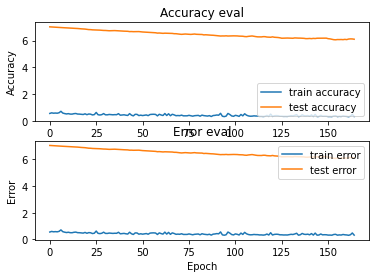

In [ ]:
plot_history(history_5_1)

Lets try to play with dropouts & then Regularization as was explained in::
https://github.com/musikalkemist/DeepLearningForAudioWithPython/blob/master/14-%20Solving%20overfitting%20in%20neural%20networks/code/solving_overfitting.py

https://www.youtube.com/watch?v=Gf5DO6br0ts

First lets increase dropuout from 0.1 to 0.3 & patience = 15 from 10

In [ ]:
## KHDS_KerasTuner_Optimized_NN_2 ==> from here we picked the best model with best r2 so far!!
##PASS 10: ==> lETS replicate pass 2 --> PASS 2: This has best result so far on both test & train = R2. 
from keras.activations import linear
batch_size = 30
epochs = 500

# build the model
#input_dim = X_train_scaled.shape[1]

lr_model_d = Sequential()
lr_model_d.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform')) 
lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(512, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(128, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
lr_model_d.add(Dropout(0.3))
#lr_model_d.add(Dense(256, kernel_initializer='he_uniform', activation=tf.nn.relu)) #from 64 to 128
#lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))

# compile the model
#lr_model.compile(loss='mean_squared_error',optimizer=sgd)
lr_model_d.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse', 'mae', 'mape'])

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') #patience reduced to 10 from 15

In [ ]:
history_5_2 = lr_model_d.fit(trainX_scaled, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 70: early stopping


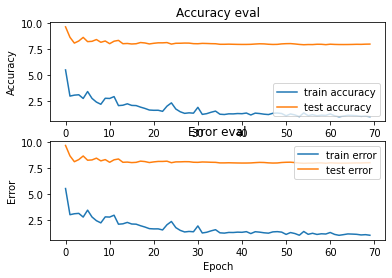

In [ ]:
plot_history(history_5_2)

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import regularizers
#https://keras.io/api/layers/regularizers/

In [ ]:
## KHDS_KerasTuner_Optimized_NN_2 ==> from here we picked the best model with best r2 so far!!
##PASS 10: ==> lETS replicate pass 2 --> PASS 2: This has best result so far on both test & train = R2. 
from keras.activations import linear
batch_size = 30
epochs = 500

# build the model
#input_dim = X_train_scaled.shape[1]

lr_model_d = Sequential()
#lr_model_d.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform'),kernel_regularizer=keras.regularizers.l2(0.001)) 
lr_model_d.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(512, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) #from 64 to 128
lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(128, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) #from 64 to 128
lr_model_d.add(Dropout(0.3))
#lr_model_d.add(Dense(256, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) #from 64 to 128
#lr_model_d.add(Dropout(0.3))
lr_model_d.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))

# compile the model
#lr_model.compile(loss='mean_squared_error',optimizer=sgd)
lr_model_d.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse', 'mae', 'mape'])

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') #patience reduced to 10 from 15

In [ ]:
history_5_3 = lr_model_d.fit(trainX_scaled, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 41: early stopping


In [ ]:
# evaluate the model
train_mse = lr_model_d.evaluate(trainX_scaled, trainy_scaled, verbose=0)
test_mse = lr_model_d.evaluate(testX_scaled, testy_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

Train: 1.134, Test: 8.071


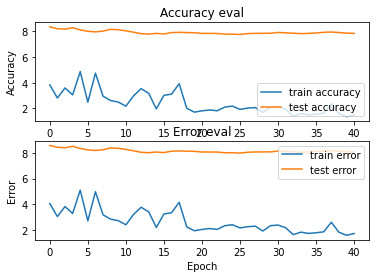

In [ ]:
plot_history(history_5_3)

In [ ]:
## KHDS_KerasTuner_Optimized_NN_2 ==> from here we picked the best model with best r2 so far!!
##PASS 10: ==> lETS replicate pass 2 --> PASS 2: This has best result so far on both test & train = R2. 
from keras.activations import linear
batch_size = 30
epochs = 500

# build the model
#input_dim = X_train_scaled.shape[1]

lr_model_d_1 = Sequential()
#lr_model_d_1.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform'),kernel_regularizer=keras.regularizers.l2(0.001)) 
#lr_model_d_1.add(Dense(32, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
lr_model_d_1.add(Dense(32, input_shape=(33,), activation=tf.nn.relu))
lr_model_d_1.add(Dropout(0.1))
#lr_model_d_1.add(Dense(64, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
#lr_model_d_1.add(Dropout(0.3))
#lr_model_d_1.add(Dense(64, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
#lr_model_d_1.add(Dropout(0.3))
#lr_model_d_1.add(Dense(256, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
#lr_model_d_1.add(Dropout(0.3))
#lr_model_d_1.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
lr_model_d_1.add(Dense(1, ))

# compile the model
#lr_model.compile(loss='mean_squared_error',optimizer=sgd)
#lr_model_d_1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse', 'mae', 'mape'])
lr_model_d_1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['mse'])
#lr_model_d_1.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.0001), metrics=['mse', 'mae', 'mape'])

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') #patience reduced to 10 from 15

In [ ]:
#history_5_4 = lr_model_d.fit(trainX_scaled, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])
history_5_4 = lr_model_d_1.fit(trainX, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])

Epoch 158: early stopping


In [ ]:
# evaluate the model
train_mse = lr_model_d_1.evaluate(trainX, trainy_scaled, verbose=0)
test_mse = lr_model_d_1.evaluate(testX, testy_scaled, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

Train: 77752.945, Test: 31568.818


Train: 1.079, Test: 8.068
Train: 1.077, Test: 8.113
Train: 1.065, Test: 8.094
Train: 0.668, Test: 6.771 with simplest model 

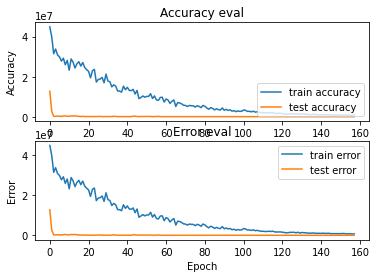

In [ ]:
plot_history(history_5_4)

Lets use from keras.wrappers.scikit_learn import KerasRegressor to build an NN.
Basically idea is to use kfold cross validation for NN based on cross_val_score.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [ ]:

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.activations import linear
import tensorflow.keras as keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam# define model
from keras.optimizer_v2.adam import Adam

In [ ]:
y

0       2.0
1       0.5
2       3.0
3       4.0
4       3.0
       ... 
706    19.0
707    20.0
708    25.0
709    28.0
710    19.0
Name: Product Sulphur, Length: 711, dtype: float64

In [ ]:
# define base model
def baseline_model():
  lr_model_d_1 = Sequential()
  #lr_model_d_1.add(Dense(64, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform'),kernel_regularizer=keras.regularizers.l2(0.001)) 
  #lr_model_d_1.add(Dense(32, input_shape=(33,), activation=tf.nn.relu, kernel_initializer='he_uniform', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
  lr_model_d_1.add(Dense(32, input_shape=(33,), activation=tf.nn.relu))
  lr_model_d_1.add(Dropout(0.1))
  #lr_model_d_1.add(Dense(64, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
  lr_model_d_1.add(Dense(64, kernel_initializer='he_uniform', activation=tf.nn.relu))
  lr_model_d_1.add(Dropout(0.1))
  #lr_model_d_1.add(Dense(64, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
  #lr_model_d_1.add(Dropout(0.3))
  #lr_model_d_1.add(Dense(256, kernel_initializer='he_uniform', activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5))) #from 64 to 128
  #lr_model_d_1.add(Dropout(0.3))
  lr_model_d_1.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
  #lr_model_d_1.add(Dense(1, ))
  # Compile model
  lr_model_d_1.compile(loss='mean_squared_error', optimizer='adam')
  return lr_model_d_1

In [ ]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0, shuffle=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -6330.64 (18721.69) MSE


Best score so far :: Baseline: -34.48 (35.34) MSE

In [ ]:
import numpy as np
estimator.fit(X, y)
prediction = estimator.predict(X)

train_error =  np.abs(y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [ ]:
print("mean error" , mean_error , min_error , max_error , std_error)

mean error 2.9515584695858963 0.038472008705139116 81.52578711509705 4.459649962295211


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(prediction,y))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(prediction,y)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(prediction,y)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(prediction,y)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(prediction,y)
print("Final score (MAPE): {}".format(score3))
#score4 = metrics.mean_squared_log_error(predicted_y_scaled,testy_scaled)
#print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,testy_scaled)

Before save score (RMSE): 5.347913161746728
Final score (MSE): 28.600175185583886
Final score (MAE): 2.9515584695858963
Final score (R2): -244.30781906197856
Final score (MAPE): 2.1024515310739944


In [ ]:
model = baseline_model()
model.fit(X, y, epochs=100, batch_size=5, verbose=False, shuffle=False)
prediction_base = model.predict(X)

In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(prediction_base,y))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(prediction_base,y)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(prediction_base,y)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(prediction_base,y)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(prediction_base,y)
print("Final score (MAPE): {}".format(score3))
#score4 = metrics.mean_squared_log_error(predicted_y_scaled,testy_scaled)
#print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,testy_scaled)

Before save score (RMSE): 5.780737420736676
Final score (MSE): 33.416925127505316
Final score (MAE): 3.4334662339858366
Final score (R2): -19.340798911724722
Final score (MAPE): 3.8025718884170088


In [ ]:
y = y.to_numpy()
y = y.reshape(-1,1)
#trainy = trainy.to_numpy()
#trainy = trainy.reshape(-1,1)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
# created scaler for only X predictors
input_scaler = StandardScaler()
# fit scaler on training dataset
# fit scaler
input_scaler.fit(y)
# transform training dataset
y_scaled = input_scaler.transform(y)
# transform test dataset
#testX_scaled = input_scaler.transform(testX)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np
# created scaler for only X predictors
input_scaler = StandardScaler()
# fit scaler on training dataset
# fit scaler
input_scaler.fit(X)
# transform training dataset
X_scaled = input_scaler.transform(X)
# transform test dataset
#testX_scaled = input_scaler.transform(testX)

In [ ]:
# evaluate model ==#callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto') #patience reduced to 10 from 15
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0, shuffle=False)
#history_5_4 = lr_model_d.fit(trainX_scaled, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX_scaled, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])
#history_5_4 = lr_model_d_1.fit(trainX, trainy_scaled, batch_size=30, epochs = 500, validation_data=(testX, testy_scaled),shuffle = True, verbose = 0, callbacks = [earlystopper])
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss', patience=20)])
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0, shuffle=False,callbacks=[earlystopper])
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_scaled, y_scaled, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
import numpy as np
estimator.fit(X_scaled, y_scaled)
prediction = estimator.predict(X_scaled)

train_error =  np.abs(y_scaled - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [ ]:
print("mean error" , mean_error , min_error , max_error , std_error)

mean error 0.6296161913273055 4.899007676872902e-05 18.159416109832 1.0971493622854178


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(prediction,y_scaled))
print(f"Before save score (RMSE): {score}")
# Measure MSE error.  
score = metrics.mean_squared_error(prediction,y_scaled)
print("Final score (MSE): {}".format(score))
score1 = metrics.mean_absolute_error(prediction,y_scaled)
print("Final score (MAE): {}".format(score1))
score2 = metrics.r2_score(prediction,y_scaled)
print("Final score (R2): {}".format(score2))
score3 = metrics.mean_absolute_percentage_error(prediction,y_scaled)
print("Final score (MAPE): {}".format(score3))
#score4 = metrics.mean_squared_log_error(predicted_y_scaled,testy_scaled)
#print("Final score (MSLE): {}".format(score4))
#score5 = metrics.log_loss(predicted_y_scaled,testy_scaled)

Before save score (RMSE): 0.5319021764031656
Final score (MSE): 0.28291992526242427
Final score (MAE): 0.3054030092483974
Final score (R2): 0.5266885162624682
Final score (MAPE): 3.6766527177182344


hence PROVED that scaled data has much better scores. 
UNSCALED data has this score:
Before save score (RMSE): 5.347913161746728
Final score (MSE): 28.600175185583886
Final score (MAE): 2.9515584695858963
Final score (R2): -244.30781906197856
Final score (MAPE): 2.1024515310739944

ANd SCALED data has this score:
Before save score (RMSE): 0.5319021764031656
Final score (MSE): 0.28291992526242427
Final score (MAE): 0.3054030092483974
Final score (R2): 0.5266885162624682
Final score (MAPE): 3.6766527177182344

**Basically Scaled data solved r2 negative problem in short!**